In [1]:
import numpy as np
print(np.__version__)


1.23.5


In [2]:
import psycopg2
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pytz
import pandas_ta as ta


controllers_path = os.path.abspath("../historic_updater")
sys.path.append(controllers_path)

from controllers import *

## Connections

In [3]:
credentials = CredentialsManager()
pg_credentials = PgCredentialsManager(credentials)
cnx=PgConnecionManager(pg_credentials)

Credentials set
Connection sucessful


## Read data

In [4]:
# Consulta SQL
query = "SELECT * FROM public.btcusdtfutures_live"

# Cargar datos en un DataFrame
df = pd.read_sql(query, cnx.connection)

# Cerrar conexión
cnx.connection.close()

/tmp/ipykernel_1019/282707416.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx.connection)


## Data preprocessing

In [5]:
df['open_time'] = pd.to_datetime(df['open_time']).dt.tz_localize(pytz.UTC)
df['year']= df.open_time.dt.year
df['month']= df.open_time.dt.month
df['year-month'] = df.open_time.dt.strftime('%Y%m').astype(int)
df['hour'] = df.open_time.dt.hour


In [6]:
df.sort_values(by='open_time',ascending=True,inplace=True)
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month,hour
425253,2019-09-02 07:10:00+00:00,9738.28,9741.56,9736.05,9739.12,8277.300,2019-09-02 07:14:59.999,1.007664e+09,284,3479.290,4.235902e+08,0.0,2019,9,201909,7
425254,2019-09-02 07:15:00+00:00,9739.16,9742.23,9735.15,9736.39,11407.030,2019-09-02 07:19:59.999,1.388855e+09,374,7122.550,8.672433e+08,0.0,2019,9,201909,7
425255,2019-09-02 07:20:00+00:00,9736.10,9741.42,9734.14,9735.05,10085.650,2019-09-02 07:24:59.999,1.227622e+09,352,4641.600,5.650122e+08,0.0,2019,9,201909,7
425256,2019-09-02 07:25:00+00:00,9735.99,9742.00,9734.08,9740.01,11334.200,2019-09-02 07:29:59.999,1.379642e+09,397,5586.620,6.800527e+08,0.0,2019,9,201909,7
425257,2019-09-02 07:30:00+00:00,9740.01,9741.98,9735.88,9741.00,11742.647,2019-09-02 07:34:59.999,1.429618e+09,521,5666.799,6.899566e+08,0.0,2019,9,201909,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173243,2025-02-04 05:00:00+00:00,100008.60,100055.10,99408.10,99461.20,2045.995,2025-02-04 05:04:59.999,2.039823e+08,38488,690.909,6.886481e+07,0.0,2025,2,202502,5
173244,2025-02-04 05:05:00+00:00,99461.20,99540.50,99120.00,99347.30,2945.132,2025-02-04 05:09:59.999,2.925224e+08,49415,1523.740,1.513616e+08,0.0,2025,2,202502,5
173245,2025-02-04 05:10:00+00:00,99347.40,99450.00,99058.00,99085.90,1192.855,2025-02-04 05:14:59.999,1.183973e+08,28118,532.286,5.283718e+07,0.0,2025,2,202502,5
173246,2025-02-04 05:15:00+00:00,99086.00,99253.20,98506.40,98644.20,3706.670,2025-02-04 05:19:59.999,3.660884e+08,64898,1577.597,1.557698e+08,0.0,2025,2,202502,5


## Year data distribution

<Axes: xlabel='year'>

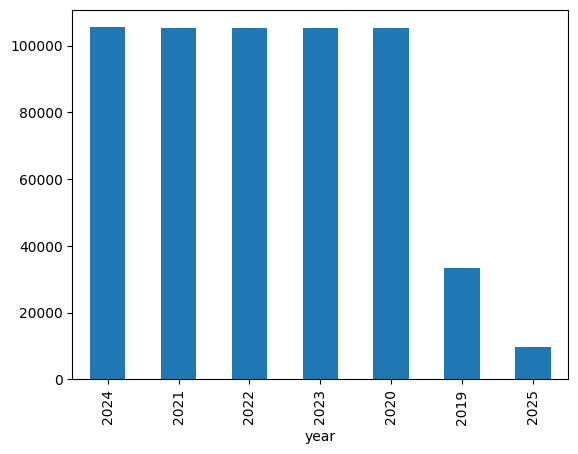

In [7]:
df.year.value_counts().plot(kind='bar')

In [8]:
df.year.value_counts()

year
2024    105408
2021    105120
2022    105120
2023    105120
2020    105106
2019     33323
2025      9857
Name: count, dtype: int64

In [9]:
df = df[df['year']>2021]

In [10]:
df.describe()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month,hour
count,325505.000000,325505.000000,325505.000000,325505.000000,325505.000000,325505,3.255050e+05,325505.000000,325505.000000,3.255050e+05,325505.0,325505.000000,325505.000000,325505.000000,325505.000000
mean,42776.071536,42820.778317,42730.744176,42776.231825,1346.340564,2023-07-20 02:44:59.999001088,4.950293e+07,12789.261225,671.918966,2.466481e+07,0.0,2023.061449,6.357537,202312.502450,11.498149
min,15573.400000,15625.000000,15443.200000,15573.400000,0.000000,2022-01-01 00:04:59.999000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,2022.000000,1.000000,202201.000000,0.000000
25%,25731.000000,25744.500000,25713.400000,25731.000000,383.098000,2022-10-10 13:24:59.999000064,1.461577e+07,5037.000000,181.430000,6.929824e+06,0.0,2022.000000,3.000000,202210.000000,5.000000
50%,36713.100000,36767.900000,36666.700000,36713.100000,720.840000,2023-07-20 02:44:59.999000064,2.711948e+07,8344.000000,352.980000,1.323671e+07,0.0,2023.000000,6.000000,202307.000000,11.000000
75%,60876.400000,60928.900000,60820.300000,60876.800000,1450.864000,2024-04-27 16:04:59.999000064,5.404486e+07,14805.000000,724.913000,2.693493e+07,0.0,2024.000000,9.000000,202404.000000,17.000000
max,109024.300000,110000.000000,108597.600000,109024.400000,86782.489000,2025-02-04 05:24:59.999000,3.212566e+09,654538.000000,52976.379000,1.621367e+09,0.0,2025.000000,12.000000,202502.000000,23.000000
std,22772.546704,22797.248238,22747.123413,22772.759195,2178.011569,NaN,7.651361e+07,14963.285040,1109.104608,3.891542e+07,0.0,0.874144,3.521787,87.115805,6.922781


## Indicator analisys

In [ ]:
df['candle_body_price'] = df.close - df.open
df['candle_body_percent'] = df.candle_body_price/df.open *100
df['candle_range_price'] = df.high - df.low
df['candle_range_percent'] = df.candle_range_price/df.open *100


/tmp/ipykernel_1019/1702835739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['candle_body_price'] = df.close - df.open
/tmp/ipykernel_1019/1702835739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['candle_body_percent'] = df.candle_body_price/df.open *100
/tmp/ipykernel_1019/1702835739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

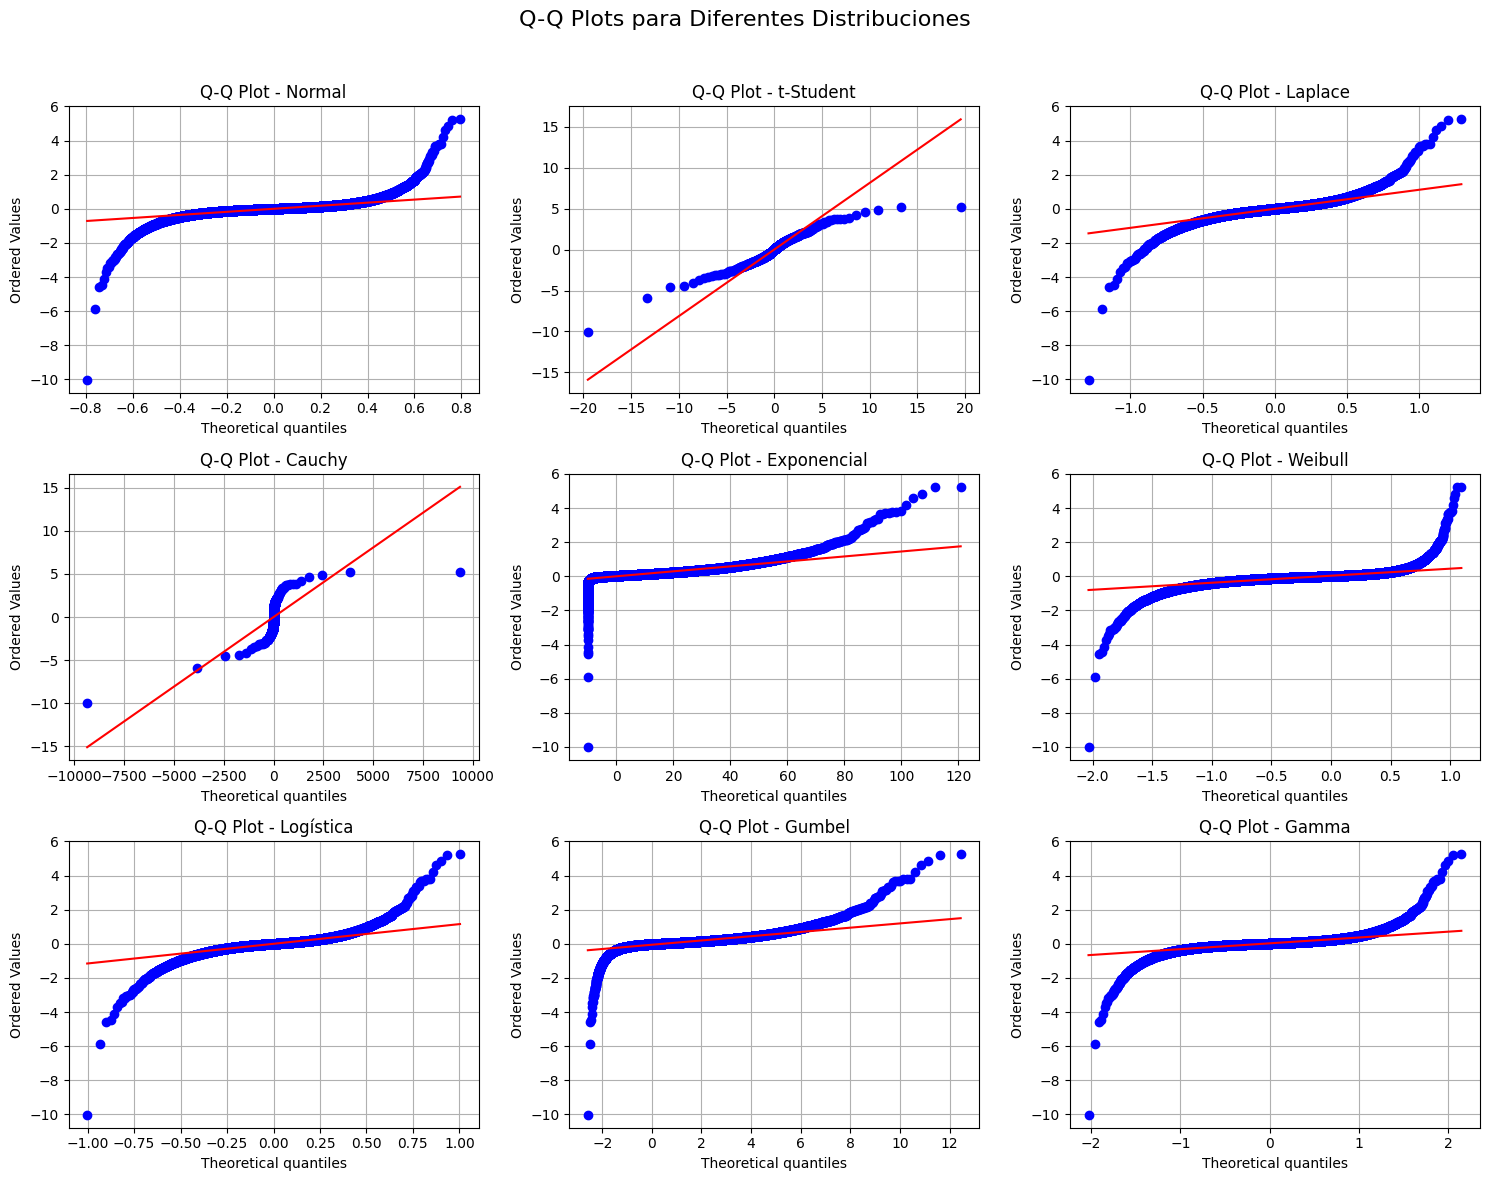

In [12]:

data = df['candle_body_percent']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


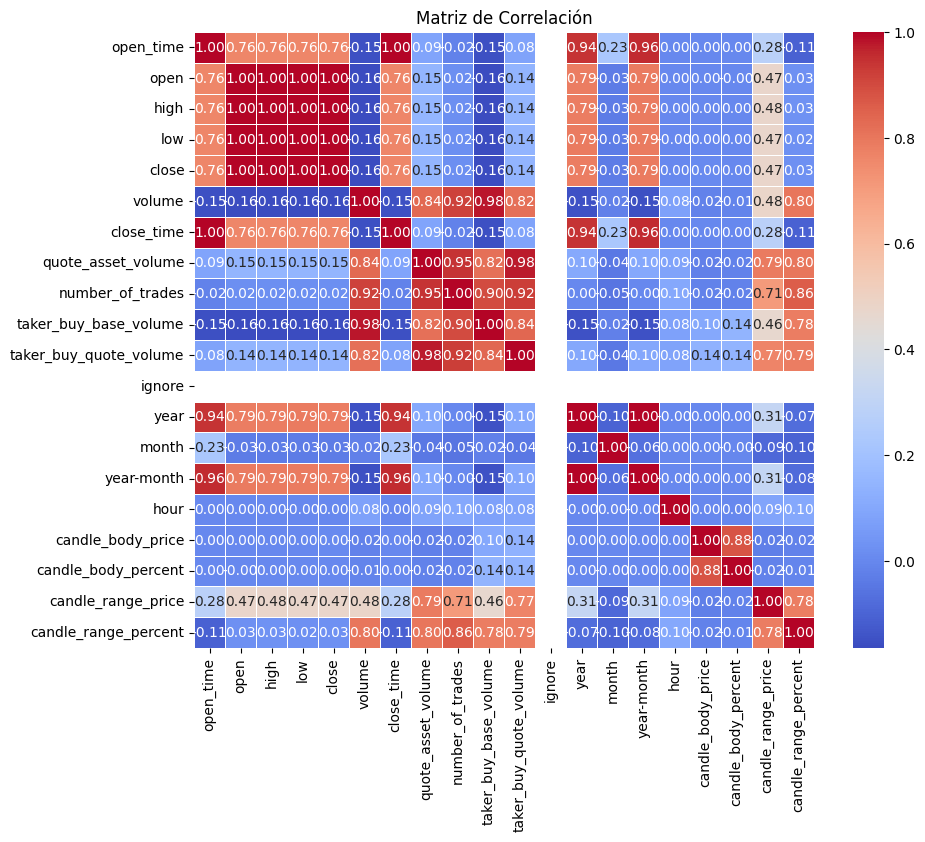

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Analityc trend indicators
Skewness
- Skew > 0.2 → More green candles (possitive skew, bullish trend).
- Skew < -0.2 → More red candles (negative skew, bearish trend).
- Skew between -0.2 y 0.2 → range.

Kurtosis
- Kurtosis > 3 → Strong breakouts and strong trend.
- Kurtosis ≈ 3 → Normal distribution, unclear trend.posible inicio de tendencia alcista.
- Kurtosis < 3 → Slow trend, possible range consolidation.

Fat tail right
- (Q90 - Q50) > 0.05 → Strong billish bias, possible start of an upward trend.
- (Q90 - Q50) ≈ 0 → No directional bias, possible range.

Fat tail left
- (Q10 - Q50) < -0.05 → Strong bullish bias, possible start of an upward trend.
- (Q10 - Q50) ≈ 0 → No directional bias, possible range.

Residue variance
- Low variance (< 0.01) → range market.
- Moderate variance (0.01 - 0.05) → posible trend change.
- High variance (> 0.05) → High volatility, possible breakout and trend continuation.

In [14]:
# Statistic extractor fn

def trend_eval(data):
    # Skewness and Kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # quantile asym
    Q90 = np.percentile(data, 90)
    Q50 = np.percentile(data, 50)
    Q10 = np.percentile(data, 10)

    quantile_skew_right = Q90 - Q50
    quantile_skew_left = Q10 - Q50

    # Residue variance
    (q_theoretical, q_ordered), _ = stats.probplot(data, dist="norm")
    residuals = q_ordered - q_theoretical
    var_residuals = np.var(residuals)


    #QQPLOT
    fig, ax = plt.subplots(figsize=(6,6))
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title("QQ-Plot del % de Cambio de las Velas")
    plt.show()

    # Results
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    print(f"Fat tail right (Q90 - Q50): {quantile_skew_right:.4f}")
    print(f"Fat tail left (Q10 - Q50): {quantile_skew_left:.4f}")
    print(f"Residue variance: {var_residuals:.6f}")

In [15]:
def identificar_tendencia(df):
    """
    Esta función recibe un DataFrame con datos históricos (que contenga las columnas 'High', 'Low' y 'Close'),
    calcula dos EMAs y el ADX, y determina la tendencia en cada vela.
    
    La regla es:
      - Si EMA de 9 periodos > EMA de 21 periodos y ADX > 25  => Tendencia alcista ("uptrend").
      - Si EMA de 9 periodos < EMA de 21 periodos y ADX > 25  => Tendencia bajista ("downtrend").
      - En otro caso, se considera que el mercado está en rango ("sideways").
    """
    # Cálculo de las EMAs
    df['EMA9'] = ta.ema(df['close'], length=9)
    df['EMA21'] = ta.ema(df['close'], length=21)
    
    # Cálculo del ADX. pandas_ta devuelve un DataFrame con varias columnas: ADX, +DI, -DI.
    # Usamos el ADX con un período por defecto de 14.
    adx_df = ta.adx(high=df['high'], low=df['low'], close=df['close'])
    df['ADX'] = adx_df['ADX_14']
    
    # Función para determinar la tendencia según las condiciones definidas.
    def señal_tendencia(row):
        if pd.isna(row['EMA9']) or pd.isna(row['EMA21']) or pd.isna(row['ADX']):
            return 'undefined'
        if row['EMA9'] > row['EMA21'] and row['ADX'] > 25:
            return 'uptrend'
        elif row['EMA9'] < row['EMA21'] and row['ADX'] > 25:
            return 'downtrend'
        else:
            return 'sideways'
    
    df['Tendencia'] = df.apply(señal_tendencia, axis=1)
    
    return df


# Aplicamos la función para identificar la tendencia
df = identificar_tendencia(df)
df


/tmp/ipykernel_1019/1074434203.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA9'] = ta.ema(df['close'], length=9)
/tmp/ipykernel_1019/1074434203.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA21'] = ta.ema(df['close'], length=21)
/tmp/ipykernel_1019/1074434203.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,...,year-month,hour,candle_body_price,candle_body_percent,candle_range_price,candle_range_percent,EMA9,EMA21,ADX,Tendencia
171390,2022-01-01 00:00:00+00:00,46210.57,46390.83,46210.55,46316.17,1081.090,2022-01-01 00:04:59.999,5.005882e+07,9513,608.545,...,202201,0,105.60,0.228519,180.28,0.390127,NaN,NaN,NaN,undefined
182353,2022-01-01 00:05:00+00:00,46316.17,46530.99,46275.00,46372.32,1260.156,2022-01-01 00:09:59.999,5.851944e+07,11538,575.491,...,202201,0,56.15,0.121232,255.99,0.552701,NaN,NaN,NaN,undefined
182354,2022-01-01 00:10:00+00:00,46372.31,46389.93,46270.00,46335.10,563.988,2022-01-01 00:14:59.999,2.612711e+07,6525,270.616,...,202201,0,-37.21,-0.080242,119.93,0.258624,NaN,NaN,NaN,undefined
182355,2022-01-01 00:15:00+00:00,46335.10,46338.65,46239.00,46296.93,508.058,2022-01-01 00:19:59.999,2.352313e+07,5786,301.342,...,202201,0,-38.17,-0.082378,99.65,0.215064,NaN,NaN,NaN,undefined
182356,2022-01-01 00:20:00+00:00,46296.97,46422.00,46290.44,46398.59,524.820,2022-01-01 00:24:59.999,2.433661e+07,6304,287.698,...,202201,0,101.62,0.219496,131.56,0.284165,NaN,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173243,2025-02-04 05:00:00+00:00,100008.60,100055.10,99408.10,99461.20,2045.995,2025-02-04 05:04:59.999,2.039823e+08,38488,690.909,...,202502,5,-547.40,-0.547353,647.00,0.646944,100018.004061,100295.173860,33.894566,downtrend
173244,2025-02-04 05:05:00+00:00,99461.20,99540.50,99120.00,99347.30,2945.132,2025-02-04 05:09:59.999,2.925224e+08,49415,1523.740,...,202502,5,-113.90,-0.114517,420.50,0.422778,99883.863249,100209.003509,36.630063,downtrend
173245,2025-02-04 05:10:00+00:00,99347.40,99450.00,99058.00,99085.90,1192.855,2025-02-04 05:14:59.999,1.183973e+08,28118,532.286,...,202502,5,-261.50,-0.263218,392.00,0.394575,99724.270599,100106.903190,39.246380,downtrend
173246,2025-02-04 05:15:00+00:00,99086.00,99253.20,98506.40,98644.20,3706.670,2025-02-04 05:19:59.999,3.660884e+08,64898,1577.597,...,202502,5,-441.80,-0.445875,746.80,0.753689,99508.256479,99973.930173,42.189255,downtrend


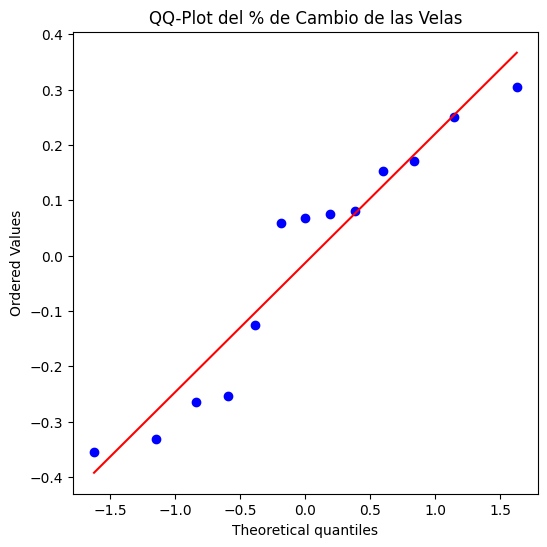

Skewness: -0.30
Kurtosis: -1.31
Fat tail right (Q90 - Q50): 0.1665
Fat tail left (Q10 - Q50): -0.3853
Residue variance: 0.473813


In [16]:

end_str = "2025-02-03 01:30:00"
start_str = "2025-02-03 02:30:00"


colombia_tz = pytz.timezone('America/Bogota')
start_local = colombia_tz.localize(pd.to_datetime(start_str))
end_local = colombia_tz.localize(pd.to_datetime(end_str))
start_utc = start_local.astimezone(pytz.UTC)
end_utc = end_local.astimezone(pytz.UTC)

# Filtrar el DataFrame
filtered_df = df[(df['open_time'] >= end_utc) & (df['open_time'] <= start_utc)]
data = filtered_df['candle_body_percent']

trend_eval(data)

In [17]:
filtered_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,...,year-month,hour,candle_body_price,candle_body_percent,candle_range_price,candle_range_percent,EMA9,EMA21,ADX,Tendencia
173288,2025-02-03 06:30:00+00:00,94387.7,94578.5,94278.1,94549.6,853.061,2025-02-03 06:34:59.999,8.056797e+07,19928,501.244,...,202502,6,161.9,0.171527,300.4,0.318262,94111.994984,93860.818061,23.502210,sideways
173289,2025-02-03 06:35:00+00:00,94549.6,94573.6,94127.1,94213.9,835.783,2025-02-03 06:39:59.999,7.882326e+07,21958,274.530,...,202502,6,-335.7,-0.355052,446.5,0.472239,94132.375987,93892.916419,24.022145,sideways
173290,2025-02-03 06:40:00+00:00,94213.8,94279.4,93924.6,93965.3,871.038,2025-02-03 06:44:59.999,8.190662e+07,20930,306.128,...,202502,6,-248.5,-0.263762,354.8,0.376590,94098.960790,93899.496744,23.610912,sideways
173291,2025-02-03 06:45:00+00:00,93965.3,94144.1,93928.1,94040.5,381.602,2025-02-03 06:49:59.999,3.588758e+07,15041,227.381,...,202502,6,75.2,0.080030,216.0,0.229872,94087.268632,93912.315222,23.229054,sideways
173292,2025-02-03 06:50:00+00:00,94040.5,94237.2,93605.1,93729.4,1074.914,2025-02-03 06:54:59.999,1.009035e+08,23314,378.471,...,202502,6,-311.1,-0.330815,632.1,0.672157,94015.694905,93895.686566,21.603849,sideways
173293,2025-02-03 06:55:00+00:00,93729.4,93876.0,93726.6,93872.7,496.836,2025-02-03 06:59:59.999,4.659845e+07,14932,236.015,...,202502,6,143.3,0.152887,149.4,0.159395,93987.095924,93893.596878,20.094730,sideways
173294,2025-02-03 07:00:00+00:00,93872.7,94162.8,93805.7,94158.1,457.060,2025-02-03 07:04:59.999,4.296420e+07,15785,261.746,...,202502,7,285.4,0.304029,357.1,0.380409,94021.296739,93917.642616,19.646841,sideways
173295,2025-02-03 07:05:00+00:00,94158.2,94158.2,93912.7,93919.9,348.800,2025-02-03 07:09:59.999,3.279181e+07,15072,150.639,...,202502,7,-238.3,-0.253085,245.5,0.260731,94001.017392,93917.847833,19.230944,sideways
173296,2025-02-03 07:10:00+00:00,93920.0,94046.6,93869.8,93974.6,250.062,2025-02-03 07:14:59.999,2.349143e+07,13419,115.821,...,202502,7,54.6,0.058135,176.8,0.188245,93995.733913,93923.007121,18.659888,sideways
173297,2025-02-03 07:15:00+00:00,93974.7,94209.7,93974.7,94209.7,373.685,2025-02-03 07:19:59.999,3.516215e+07,12726,191.192,...,202502,7,235.0,0.250067,235.0,0.250067,94038.527131,93949.070110,18.669606,sideways
